In [14]:
from hstar import gghzz, c6, msq
from hzz import angles, zpair

import numpy as np
import matplotlib.pyplot as plt

In [15]:
SAMPLE_DIR = '..'

In [16]:
sample = gghzz.Process(  
    (1.4783394, SAMPLE_DIR + '/ggZZ2e2m_all_new.csv', 1e6),
    (0.47412769, SAMPLE_DIR + '/ggZZ4e_all_new.csv', 1e6),
    (0.47412769, SAMPLE_DIR + '/ggZZ4m_all_new.csv', 1e6)
)

In [ ]:
z_chooser = zpair.ZPairChooser(bounds1=(50,115), bounds2=(50,115), algorithm='leastsquare')
l1_1, l2_1, l1_2, l2_2 = sample.events.filter(z_chooser)

kinematics = angles.calculate(l1_1, l2_1, l1_2, l2_2)

c6_mod = c6.Modifier(amplitude_component = msq.Component.SIG, c6_values = [-5,-1,0,1,5])
c6_weights, c6_prob = c6_mod.modify(sample=sample, c6=[-20,-10,10,20,30])

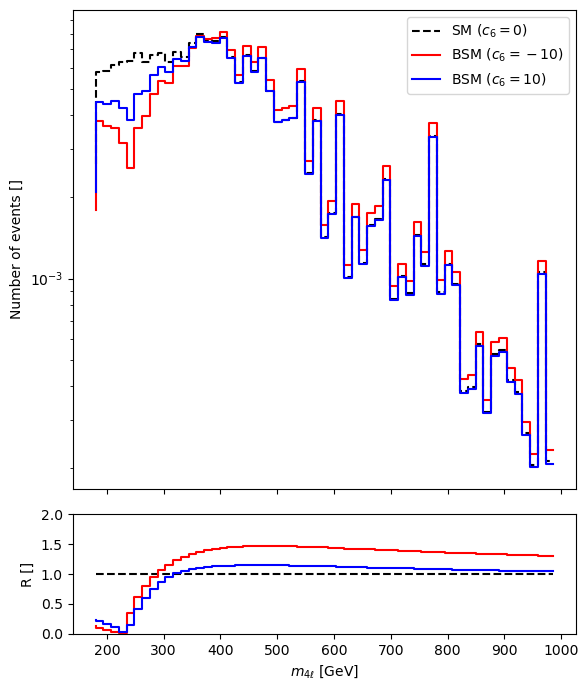

In [ ]:
m4l = (l1_1 + l2_1 + l1_2 + l2_2).mass

hist, bins = np.histogram(m4l, bins=40, range=(180,1000), weights=sample[msq.Component.SIG].weights)
hist1, bins = np.histogram(m4l, bins=40, range=(180,1000), weights=c6_weights.T[1]) # -10
hist2, bins = np.histogram(m4l, bins=40, range=(180,1000), weights=c6_weights.T[2]) # 10
hist3, bins = np.histogram(m4l, bins=40, range=(180,1000), weights=c6_weights.T[0]) # -20
hist4, bins = np.histogram(m4l, bins=40, range=(180,1000), weights=c6_weights.T[3]) # 20
hist5, bins = np.histogram(m4l, bins=40, range=(180,1000), weights=c6_weights.T[4]) # 30

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist, color='k', label=u'SM ($c_6=0$)', linestyle='--')
ax1.step(bins[:-1], hist1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist2, color='b', label=u'BSM ($c_6=10$)')
#ax1.step(bins[:-1], hist5, color='b', label=u'BSM ($c_6=30$)')

ax1.set_ylabel('Number of events []')
ax1.set_yscale('log')

ax1.legend()


ax2.step(bins[:-1], hist/hist, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist3/hist, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist4/hist, color='b', label=u'BSM ($c_6=10$)')
#ax2.step(bins[:-1], hist5/hist, color='b', label=u'BSM ($c_6=30$)')

ax2.set_xlabel(u'$m_{4\ell}$ [GeV]')
ax2.set_ylabel('R []')
ax2.set_ybound(0.,2)

fig.tight_layout()

plt.show()